# Reinforcement Learning Final Project 

Welcome to our Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, we will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

# Ready to Play Chess?

<div class="alert alert-block alert-info">

## Index
    
[1. Import necessary libraries](#1)<br>

[2. Environment](#2)<br>
    
[3. Learning Algorithms](#3)<br>

- [3.1. Neural Network](#3.1)<br>


    - [3.1.1 NN evaluation against Stockfish](#3.1.1)<br>


- [3.2. Deep Q-Network](#3.2)<br>  


    - [3.2.1 DQN evaluation against Stockfish](#3.2.1)<br>


- [3.3. Monte Carlo Tree Search combined with NN](#3.3)<br> 


    - [3.3.1 MCTS with NN evaluation against Stockfish](#3.3.1)<br>

    
    
[4. Performance Measures](#4)<br>


<a class="anchor" id="1">

## 1. Import necessary libraries
    
</a>

In [3]:
import chess
import chess.engine
import math
import random
import numpy as np
import h5py
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from stockfish import Stockfish
import gym
import gym_chess
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

<a class="anchor" id="2">

## 2. Environment
    
</a>

In [6]:
#Stockfish_path = "c:/Users/AnaMi/OneDrive - NOVAIMS/Master_Nova_IMS/2nd semester/ReinforcementLearning/Project/Reinforcement-Learning-Project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"
Stockfish_path = "C:/Users/sofia/NOVA IMS/1st year/Semester 2/Reinforcement Learning/stockfish_15.1_win_x64_avx2/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"
#Stockfish_path = "C:/Users/David/Desktop/Nova IMS/2º semestre/Reinforcement Learning/project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"

In [7]:
board = chess.Board()
engine = chess.engine.SimpleEngine.popen_uci(Stockfish_path)

# Set the initial state
state = chess.Board()

<a class="anchor" id="3">

## 3. Learning Algorithms
    
</a>

<a class="anchor" id="3.1">

### 3.1. Neural Network (NN)
    
</a>

Neural networks play a crucial role in training an agent to play chess. It takes the chess board state as input and learns to predict the best move in a given position. Through a process called backpropagation, the network adjusts its internal weights based on the observed rewards obtained from playing chess games. This allows the neural network to capture complex patterns and strategic insights, enabling the agent to make informed decisions. By iteratively training the neural network using many chess positions and moves, the agent can learn from its mistakes and improve its gameplay over time. The neural network serves as a powerful function approximator, allowing the agent to generalize its knowledge and make good moves even in unseen positions.

Find below the code to train our agent using this algortihm:

In [8]:
# Set the counter for the number of steps
counter = 0

# Define the Neural Network Model
input_shape = (64,)
action_space_size = 4096

model = keras.Sequential()
model.add(keras.layers.Dense(4096, activation='relu', input_shape=input_shape))
model.add(keras.layers.Dense(2048, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(action_space_size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy')

# Define the function to preprocess the state
def preprocess_state(state):
    # Convert the chess board state to a binary representation
    binary_state = np.zeros(64, dtype=np.float32)

    for i in range(64):
        piece = state.piece_at(i)
        if piece is not None:
            piece_value = {'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
                           'p': -1, 'n': -2, 'b': -3, 'r': -4, 'q': -5, 'k': -6}
            binary_state[i] = piece_value[piece.symbol()]

    return binary_state

# Define the function to select an action
def select_action(state):
    while True:
        state_input = np.array([preprocess_state(state)])
        action_probabilities = model.predict(state_input)[0]
        action = np.random.choice(action_space_size, p=action_probabilities)
        moves = list(state.legal_moves)
        if action < len(moves):
            return action

# Define the training loop
def train_agent(model, num_episodes):
    for episode in range(num_episodes):
        state = chess.Board()  # Reset the state at the beginning of each episode
        done = False
        counter = 0
        while not done:
            action = select_action(state)
            moves = list(state.legal_moves)
            move = moves[action]
            state.push(move)
            counter += 1

            state_input = np.array([preprocess_state(state)])
            next_state_input = state_input  # In chess, the next state is the same as the current state after making a move
            if action < action_space_size:
                target = model.predict(state_input)
                target[0][action] = 1.0  # The target for the selected action is 1.0 (assuming a perfect policy)
                model.fit(state_input, target, epochs=1, verbose=0)

            done = state.is_game_over()

        print("Episode:", episode+1, "Steps:", counter)
        
        # Save the model after each episode
        model.save('chess_agent_nn.h5')

# Train the modified model
train_agent(model, num_episodes=1)

1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 40ms/step


KeyboardInterrupt: 

In [35]:
def preprocess_state(board):
    """
    Preprocess the chess board state.

    Args:
        board (chess.Board): The chess board.

    Returns:
        np.array: The preprocessed state array.
    """
    state_array = np.zeros(64)
    for i in range(64):
        piece = board.piece_at(i)
        if piece is not None:
            state_array[i] = piece.piece_type
    return state_array

def select_action1(board, policy):
    """
    Select an action using the policy network.

    Args:
        board (chess.Board): The chess board.
        policy (tf.keras.Model): The policy network model.

    Returns:
        int: The index of the selected action.
    """
    state_array = preprocess_state(board)
    state_input = np.array([state_array])
    action_probabilities = policy.predict(state_input)[0]
    valid_moves = list(board.legal_moves)
    valid_move_indices = [move_to_index(move) for move in valid_moves]

    valid_action_probabilities = []
    for i in valid_move_indices:
        if i < len(action_probabilities):
            valid_action_probabilities.append(action_probabilities[i])
        else:
            valid_action_probabilities.append(0.0)

    total_prob = sum(valid_action_probabilities)

    if total_prob == 0.0:
        action = np.random.choice(len(valid_moves))
    else:
        valid_action_probabilities = [prob / total_prob for prob in valid_action_probabilities]
        action = np.random.choice(len(valid_moves), p=valid_action_probabilities)

    return valid_moves[action]

def move_to_index(move):
    """
    Convert a chess move to an index.

    Args:
        move (chess.Move): A chess move.

    Returns:
        int: The index corresponding to the move.
    """
    return move.from_square * 64 + move.to_square

def generate_ep(stockfish_path, agent_policy):
    """
    Generate a single episode of the game.

    Args:
        stockfish_path (str): The file path to the Stockfish engine.
        agent_policy (tf.keras.Model): The policy network model.

    Returns:
        int: The reward for the episode (1 for victory, -1 for defeat, 0 for draw).
        int: The number of steps taken in the episode.
    """
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    board = chess.Board()
    counter = 0

    while not board.is_game_over():
        if board.turn == chess.WHITE:
            # Agent's turn
            action = select_action1(board, agent_policy)
        else:
            # Stockfish's turn
            result = engine.play(board, chess.engine.Limit(time=2.0))
            action = result.move

        board.push(action)
        counter += 1

    result = None
    if board.is_checkmate():
        result = 1 if board.turn == chess.BLACK else -1
    elif board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
        result = 0

    engine.quit()
    return result, counter


<a class="anchor" id="3.1.1">

### 3.1.1. NN evaluation against Stockfish
    
</a>

Now let's evaluate the performance of our agent, trained using Neural Network, by playing a chess game against the stockfish engine.

In [10]:
def evaluate_agent(stockfish_path, agent_policy, num_games):
    game_results = []
    step_counts = []
    
    for game in range(num_games):
        result, steps = generate_ep(stockfish_path, agent_policy)
        game_results.append(result)
        step_counts.append(steps)
        
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({'Steps': step_counts, 'Result': game_results})
    
    # Replace result values with "Loss", "Win", or "Draw"
    results_df['Result'] = results_df['Result'].map({-1: 'Loss', 1: 'Win'})
    results_df['Result'] = results_df['Result'].fillna('Draw')
    
    # Plot the game results
    result_labels = results_df['Result'].tolist()
    plt.plot(result_labels)
    plt.xlabel('Game')
    plt.ylabel('Result')
    plt.title('Game Results')
    plt.grid(False)  # Remove the grid
    plt.show()
    
    return results_df

1/1 [==============================] - 0s 46ms/step


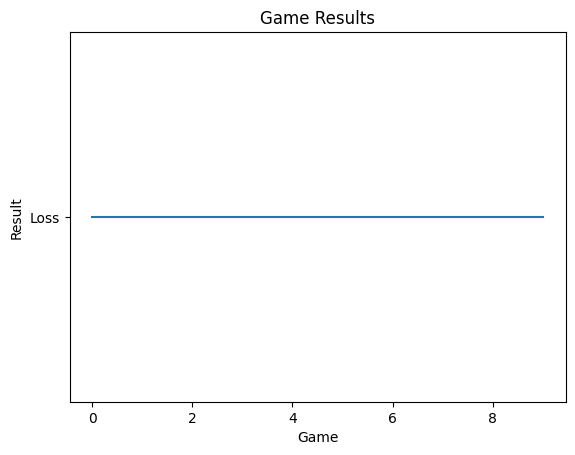

,Steps,Result
0,18,Loss
1,20,Loss
2,32,Loss
3,36,Loss
4,20,Loss
5,46,Loss
6,18,Loss
7,38,Loss
8,20,Loss
9,32,Loss


In [12]:
evaluate_agent(Stockfish_path, model, 10)

<a class="anchor" id="3.2">

### 3.2. Deep Q-Network (DQN)
    
</a>

In Deep Q-Learning, the agent learns by playing numerous games against other opponents and gradually improving its strategies based on the outcomes. Through trial and error, the agent discovers which moves lead to better outcomes and which ones should be avoided. It stores these experiences in a memory buffer, which serves as a training dataset. Using this dataset, the agent continuously updates its decision-making process, giving more weight to successful moves and less weight to unsuccessful ones. Over time, the agent becomes more skilled at evaluating chess positions, making better decisions, and increasing its chances of winning games. This iterative learning process allows the agent to adapt to different opponents, learn complex patterns, and develop advanced strategies, ultimately improving its overall performance as a chess player.

Find below the code to train our agent using this algortihm:

In [36]:
# Set the initial state
state = chess.Board()

# Set the counter for the number of steps
counter = 0

# Define the Deep Q-Network (DQN) Model
input_shape = (8, 8, 12)  # Assuming a chess board representation with channels for each piece type
action_space_size = 4096

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(action_space_size, activation='linear'))

model.compile(optimizer='adam', loss='mse')

class ReplayBuffer:
    def __init__(self, max_size):
        self.max_size = max_size
        self.buffer = []
        self.agent_plays = []
    
    def add(self, state, action, reward, next_state):
        experience = (state, action, reward, next_state)
        self.buffer.append(experience)
        
        if len(self.buffer) > self.max_size:
            self.buffer.pop(0)
    
    def sample(self, batch_size):
        batch = np.random.choice(len(self.buffer), size=batch_size, replace=False)
        states, actions, rewards, next_states = zip(*[self.buffer[i] for i in batch])
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states)

replay_buffer = ReplayBuffer(max_size=100000)

def preprocess_state(board):
    state_array = np.zeros((8, 8, 12))
    for i in range(64):
        piece = board.piece_at(i)
        if piece is not None:
            piece_type_index = piece.piece_type - 1  # Subtract 1 to convert piece type to index (0-11)
            piece_color_index = 0 if piece.color == chess.WHITE else 6
            piece_index = piece_type_index + piece_color_index
            row = i // 8
            col = i % 8
            state_array[row, col, piece_index] = 1
    return state_array


def select_action(board, dqn_model, current_step, total_steps, agent_plays):
    epsilon = max(0.1, 1.0 - current_step / total_steps)

    if np.random.rand() < epsilon:
        return np.random.choice(list(board.legal_moves))
    else:
        state_array = preprocess_state(board)
        state_input = np.array([state_array])
        q_values = dqn_model.predict(state_input)[0]
        valid_moves = list(board.legal_moves)
        valid_move_indices = [move_to_index(move) for move in valid_moves]
        valid_q_values = [q_values[i] for i in valid_move_indices]
        best_move = valid_moves[np.argmax(valid_q_values)]
        
        if agent_plays:
            historical_q_values = [q_values[move_to_index(move)] for move in agent_plays]
            best_historical_move = agent_plays[np.argmax(historical_q_values)]
            if q_values[move_to_index(best_historical_move)] > valid_q_values[np.argmax(valid_q_values)]:
                return best_historical_move
        
        return best_move



def move_to_index(move):
    """
    Convert a chess move to an index.

    Args:
        move (chess.Move): A chess move.

    Returns:
        int: The index corresponding to the move.
    """
    return move.from_square * 64 + move.to_square



def generate_episode(stockfish_path, dqn_model, replay_buffer, epsilon):
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    board = chess.Board()
    counter = 0

    while not board.is_game_over():
        state_array = preprocess_state(board)
        state_input = np.array([state_array])

        if board.turn == chess.WHITE:
            # Agent's turn
            if np.random.random() < epsilon:
                # Explore: select a random legal move
                action = np.random.choice(list(board.legal_moves))
            else:
                # Exploit: select action with highest Q-value from DQN
                q_values = dqn_model.predict(state_input)[0]
                valid_moves = list(board.legal_moves)
                valid_move_indices = [move_to_index(move) for move in valid_moves]
                valid_q_values = [q_values[i] for i in valid_move_indices]
                action = valid_moves[np.argmax(valid_q_values)]
            
            # Save agent's play to replay buffer
            replay_buffer.agent_plays.append(action)

            # Execute action and observe next state and reward
            next_state = board.copy()
            next_state.push(action)
            reward = 0  # Set the reward based on the game outcome later

            # Add experience to replay buffer
            replay_buffer.add(state_array, move_to_index(action), reward, preprocess_state(next_state))
        else:
            # Stockfish's turn
            result = engine.play(board, chess.engine.Limit(time=2.0))
            action = result.move
            next_state = board.copy()
            next_state.push(action)
            reward = 0  # Set the reward based on the game outcome later

            # Add experience to replay buffer
            replay_buffer.add(state_array, move_to_index(action), reward, preprocess_state(next_state))

        board.push(action)
        counter += 1

    # Set the reward based on the game outcome
    result = None
    if board.is_checkmate():
        result = 1 if board.turn == chess.BLACK else -1
    elif board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
        result = 0

    engine.quit()
    return result, counter


<a class="anchor" id="3.2.1">

### 3.2.1. DQL Evaluation against Stockfish
    
</a>

Now let's evaluate the performance of our agent, trained using Deep Q-Network, by playing a chess game against the stockfish engine.

In [30]:
def evaluate_dql(stockfish_path, dqn_model, num_games=10):
    game_results = []
    step_counts = []
    
    for game in range(num_games):
        result, steps = generate_episode(stockfish_path, dqn_model, replay_buffer, epsilon=0.1)
        game_results.append(result)
        step_counts.append(steps)
        
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({'Steps': step_counts, 'Result': game_results})
    
    # Replace result values with "Loss", "Win", or "Draw"
    results_df['Result'] = results_df['Result'].map({-1: 'Loss', 1: 'Win'})
    results_df['Result'] = results_df['Result'].fillna('Draw')
    
    # Plot the game results
    result_labels = results_df['Result'].tolist()
    plt.plot(result_labels)
    plt.xlabel('Game')
    plt.ylabel('Result')
    plt.title('Game Results')
    plt.grid(False)  # Remove the grid
    plt.show()
    
    return results_df

1/1 [==============================] - 0s 43ms/step


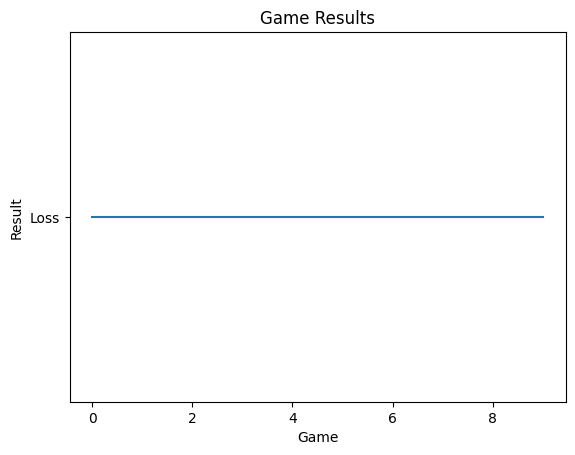

,Steps,Result
0,22,Loss
1,22,Loss
2,26,Loss
3,24,Loss
4,40,Loss
5,32,Loss
6,28,Loss
7,26,Loss
8,26,Loss
9,24,Loss


In [31]:
evaluate_dql(Stockfish_path, model, 10)

<a class="anchor" id="3.3">

### 3.3. Monte Carlo Tree Search (MCTS) combined with NN
    
</a>

Monte Carlo Tree Search stands out in handling complex and strategic games with large search spaces, where traditional algorithms may struggle due to the immense number of possible actions. MCTS combines Monte Carlo strategies, which rely on random sampling and statistical analysis, with tree-based search techniques, focusing on exploring promising areas of the search space rather than exhaustively examining the entire space. At its core, MCTS incrementally constructs a search tree by simulating multiple random plays, also known as rollouts or playouts, from the current game state. These simulations continue until a terminal state or a predefined depth is reached. The results are then backpropagated up the tree, updating node information such as visit counts and win ratios. As the search progresses, MCTS dynamically balances exploration and exploitation by considering both highly promising moves with high win ratios and unexplored or less explored moves. The Upper Confidence Bounds (UCB) formula, such as Upper Confidence Bounds for Trees (UCT), is utilized to guide the selection of moves or nodes during the search process.


Find below the code to train our agent using this combination of algortihm:

In [17]:
class Node:
    def __init__(self, move=None, parent=None):
        self.move = move
        self.parent = parent 
        self.children = []
        self.wins = 0
        self.visits = 0
        self.untried_moves = []

    def select_child(self):
        # Use the UCB1 formula to select the child with the highest UCB value
        exploration_constant = 1.4
        best_child = max(self.children, key=lambda c: c.wins / c.visits + exploration_constant * math.sqrt(math.log(self.visits) / c.visits))
        return best_child

    def expand(self, state):
        # Take an untried move, create a new state, and add a child node
        move = self.untried_moves.pop()
        new_state = state.copy()
        new_state.push(move)
        child_node = Node(move=move, parent=self)
        self.children.append(child_node)
        return child_node

    def update(self, result):
        # Update the node's wins and visits count based on the result of the simulation
        self.visits += 1
        self.wins += result

def simulate(state):
    # Simulate a game from the current state until the end and return the result (1 for a win, -1 for a loss, 0 for a draw)
    while not state.is_game_over():
        move = random.choice(list(state.legal_moves))
        state.push(move)
    result = get_result(state)
    return result

def get_result(state):
    # Calculate the result of the game (1 for a win, -1 for a loss, 0 for a draw)
    if state.is_checkmate():
        if state.turn:
            return -1
        else:
            return 1
    return 0

def monte_carlo_tree_search(state, simulations):
    root = Node()  # Create the root node
    root.untried_moves = list(state.legal_moves)

    for _ in range(simulations):
        node = root
        temp_state = state.copy()

        # Selection: Traverse the tree until an unexplored node is found or reach a leaf node
        while node.untried_moves == [] and node.children != []:
            node = node.select_child()
            temp_state.push(node.move)

        # Expansion: Expand the tree by creating a new child node
        if node.untried_moves:
            node = node.expand(temp_state)

        # Simulation: Simulate a game from the current state
        result = simulate(temp_state)

        # Backpropagation: Update the nodes' statistics from the current node to the root
        while node is not None:
            node.update(result)
            node = node.parent

    # Select the move with the highest visit count
    best_move = max(root.children, key=lambda c: c.visits).move
    return best_move

# Main code
#board = chess.Board()
#engine = chess.engine.SimpleEngine.popen_uci(Stockfish_path)
simulations = 5  # Adjust the number of simulations as desired

existing_data_loaded = False
if os.path.exists("chess_agent_mcts.h5"):
    # Load the existing model and training data
    model = tf.keras.models.load_model("chess_agent_mcts.h5")
    with h5py.File("chess_agent_mcts.h5", "r") as f:
        if "X_train" in f and "y_train" in f:
            X_existing = f["X_train"][:]
            y_existing = f["y_train"][:]
            existing_data_loaded = True

# Initialize training data and labels
X_train = []
y_train = []

# Append the existing training data to X_train and y_train
if existing_data_loaded:
    X_train.extend(X_existing)
    y_train.extend(y_existing)

# Perform MCTS simulations to collect training data
for i in range(simulations):
    state = board.copy()  # Get a copy of the initial board state
    moves = []  # Store the moves made during the simulation
    result = None  # Store the result of the simulation

    # Play out the simulation until the end
    while not state.is_game_over():
        if state.turn:
            move = monte_carlo_tree_search(state, simulations=5)
        else:
            move = engine.play(state, chess.engine.Limit(time=.000001)).move

        moves.append(move)
        state.push(move)

    # Determine the result of the simulation
    result = get_result(state)

    # Convert moves to a one-hot encoded representation
    encoded_moves = []
    for move in moves:
        encoded_move = np.zeros(64*64)  # One-hot encoding with 64*64 binary vector
        start_square = move.from_square
        end_square = move.to_square
        encoded_move[start_square*64 + end_square] = 1
        encoded_moves.append(encoded_move)

    # Add each move separately to the training data and labels
    X_train.extend(encoded_moves)
    y_train.extend([result] * len(encoded_moves))

    # Save the moves and training data at the specified interval
    save_interval = 2
    if (i + 1) % save_interval == 0:
        # Convert the training data and labels to regular NumPy arrays with a fixed shape
        X_train_np = np.array(X_train, dtype=np.float64)
        y_train_np = np.array(y_train, dtype=np.float64)

        # Define the model
        model_mcts = Sequential()
        model_mcts.add(Dense(64, activation='relu', input_shape=(64*64,), dtype='float64'))
        model_mcts.add(Dense(64, activation='relu'))
        model_mcts.add(Dense(1))

        # Compile the model
        model_mcts.compile(optimizer='adam', loss='mse')

        # Train the model
        model_mcts.fit(X_train_np, y_train_np, epochs=10, batch_size=32, verbose=1)

        # Save the trained model to a .h5 file
        model_mcts.save('chess_agent_mcts.h5')

# Convert the training data and labels to regular NumPy arrays with a fixed shape
X_train_np = np.array(X_train, dtype=np.float64)
y_train_np = np.array(y_train, dtype=np.float64)

# Define the model
model_mcts = Sequential()
model_mcts.add(Dense(64, activation='relu', input_shape=(64*64,), dtype='float64'))
model_mcts.add(Dense(64, activation='relu'))
model_mcts.add(Dense(1))

# Compile the model
model_mcts.compile(optimizer='adam', loss='mse')

# Train the model
model_mcts.fit(X_train_np, y_train_np, epochs=10, batch_size=32, verbose=1)

# Save the trained model to a .h5 file
model_mcts.save('chess_agent_mcts.h5')

Epoch 1/10
2/2 [==============================] - 1s 24ms/step - loss: 1.0121
Epoch 2/10
2/2 [==============================] - 0s 17ms/step - loss: 0.9604
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 0.9130
Epoch 4/10
2/2 [==============================] - 0s 9ms/step - loss: 0.8652
Epoch 5/10
2/2 [==============================] - 0s 15ms/step - loss: 0.8172
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 0.7680
Epoch 7/10
2/2 [==============================] - 0s 14ms/step - loss: 0.7165
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6616
Epoch 9/10
2/2 [==============================] - 0s 15ms/step - loss: 0.6050
Epoch 10/10
2/2 [==============================] - 0s 17ms/step - loss: 0.5454
Epoch 1/10
3/3 [==============================] - 1s 12ms/step - loss: 0.9507
Epoch 2/10
3/3 [==============================] - 0s 13ms/step - loss: 0.8696
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - l

<a class="anchor" id="3.3.1">

### 3.3.1. MCTS with NN evaluation against Stockfish
    
</a>

Now let's evaluate the performance of our agent, trained using Monte Carlo Tree Search combined with Neural Network, by playing a chess game against the stockfish engine.

In [19]:
def evaluate_mcts_agent(board, engine, simulations, num_games):
    game_results = []
    step_counts = []
    
    for _ in range(num_games):
        state = board.copy()
        moves = []
        result = None
        
        while not state.is_game_over():
            if state.turn:
                move = monte_carlo_tree_search(state, simulations)
            else:
                move = engine.play(state, chess.engine.Limit(time=.000001)).move

            moves.append(move)
            state.push(move)
            
        result = get_result(state)
        game_results.append(result)
        step_counts.append(len(moves))
        
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({'Steps': step_counts, 'Result': game_results})
    
    # Replace result values with "Loss", "Win", or "Draw"
    results_df['Result'] = results_df['Result'].map({-1: 'Loss', 1: 'Win'})
    results_df['Result'] = results_df['Result'].fillna('Draw')
    
    # Plot the game results
    result_labels = results_df['Result'].tolist()
    plt.plot(result_labels)
    plt.xlabel('Game')
    plt.ylabel('Result')
    plt.title('Game Results')
    plt.grid(False)  # Remove the grid
    plt.show()
    
    return results_df

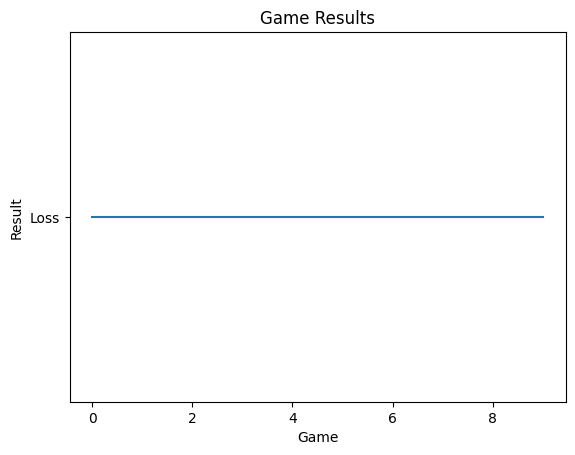

,Steps,Result
0,20,Loss
1,22,Loss
2,22,Loss
3,32,Loss
4,28,Loss
5,16,Loss
6,46,Loss
7,22,Loss
8,24,Loss
9,32,Loss


In [20]:
evaluate_mcts_agent(board, engine, 10, 10)

<a class="anchor" id="4">

### 4. Performance Measures
    
</a>

Given the objectives of the project, it is essential to measure and evaluate the performance of our agent in playing chess for benchmarking. By comparing the agent's performance with various algorithms, we can establish a baseline for measuring progress and identifying the state-of-the-art approaches. This benchmarking process helps to track the effectiveness of the agent's learning capabilities and to provide a better understanding of it's decision-making process. It also provides a reference point to understand the limitations of existing algorithms and motivates the exploration of new strategies to achieve better performance in playing chess.

In [48]:
def preprocess_state2(board):
    state_array = np.zeros(4096)
    for i in range(64):
        piece = board.piece_at(i)
        if piece is not None:
            piece_index = (piece.piece_type - 1) + (6 if piece.color == chess.BLACK else 0)
            state_array[i * 64 + piece_index] = 1
    return state_array.reshape(4096)


def select_action2(board, policy):
    """
    Select an action using the policy network.

    Args:
        board (chess.Board): The chess board.
        policy (tf.keras.Model): The policy network model.

    Returns:
        int: The index of the selected action.
    """
    state_array = preprocess_state2(board)
    state_input = np.array([state_array])
    action_probabilities = policy.predict(state_input)[0]
    valid_moves = list(board.legal_moves)
    valid_move_indices = [move_to_index(move) for move in valid_moves]

    valid_action_probabilities = []
    for i in valid_move_indices:
        if i < len(action_probabilities):
            valid_action_probabilities.append(action_probabilities[i])
        else:
            valid_action_probabilities.append(0.0)

    total_prob = sum(valid_action_probabilities)

    if total_prob == 0.0:
        action = np.random.choice(len(valid_moves))
    else:
        valid_action_probabilities = [prob / total_prob for prob in valid_action_probabilities]
        action = np.random.choice(len(valid_moves), p=valid_action_probabilities)

    return valid_moves[action]

def move_to_index2(move):
    """
    Convert a chess move to an index.

    Args:
        move (chess.Move): A chess move.

    Returns:
        int: The index corresponding to the move.
    """
    return move.from_square * 64 + move.to_square

def generate_ep2(stockfish_path, agent_policy):
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    board = chess.Board()
    counter = 0
    result = None

    while not board.is_game_over():
        if board.turn == chess.WHITE:
            # Agent's turn
            action = select_action2(board, agent_policy)
        else:
            # Stockfish's turn
            result = engine.play(board, chess.engine.Limit(time=2.0)).move

        if result is None:
            if board.is_legal(action):
                board.push(action)
            else:
                raise ValueError("Invalid move generated by the agent!")
        else:
            break

        counter += 1

    if result is None:
        # Game result is not determined yet
        reward = 0.5
    else:
        # Game result is determined
        if result == "1-0":
            reward = 1.0  # Agent wins
        elif result == "0-1":
            reward = 0.0  # Agent loses
        else:
            reward = 0.5  # Draw

    engine.quit()
    return reward, counter


In [50]:
def count_results(stockfish_path, agent_policy, n_evaluations=10):
    wins = 0
    losses = 0
    draws = 0

    for evaluation_number in tqdm(range(n_evaluations)):
        reward, _ = generate_ep2(stockfish_path, agent_policy)
        if reward == 1:
            wins += 1
        elif reward == 0:
            draws += 1
        else:
            losses += 1

    return wins, losses, draws

n_evaluations = 10

n_wins, n_losses, n_draws = count_results(Stockfish_path, model_mcts, n_evaluations)
print("Wins:", n_wins)
print("Losses:", n_losses)
print("Draws:", n_draws)


def calculate_elo_rating(wins, losses, draws, k_factor=32, initial_rating=1200):
    """
    Calculate the Elo rating based on wins, losses, and draws.

    Args:
        wins (int): Number of wins.
        losses (int): Number of losses.
        draws (int): Number of draws.
        k_factor (int): The K-factor used in Elo rating calculation. Default is 32.
        initial_rating (int): The initial rating. Default is 1200.

    Returns:
        int: The Elo rating.
    """
    expected_score = 1 / (1 + 10 ** ((initial_rating - initial_rating) / 400))
    rating_change = k_factor * ((wins + 0.5 * draws) - (losses + 0.5 * draws))
    new_rating = initial_rating + rating_change
    return new_rating


elo_ratings = [1200] + [calculate_elo_rating(n_wins, n_losses, n_draws)]

print(elo_ratings)

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step
Wins: 0
Losses: 10
Draws: 0
[1200, 880.0]


In [51]:
print(calculate_elo_rating(n_wins, n_losses, n_draws))

880.0


<hr>


### Elo Rating by Algorithm

| NN | DQN | MCTS with NN | Final Model Decison |
| --- | --- | --- | --- |
| 880 |  |  |  |



<hr>